# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


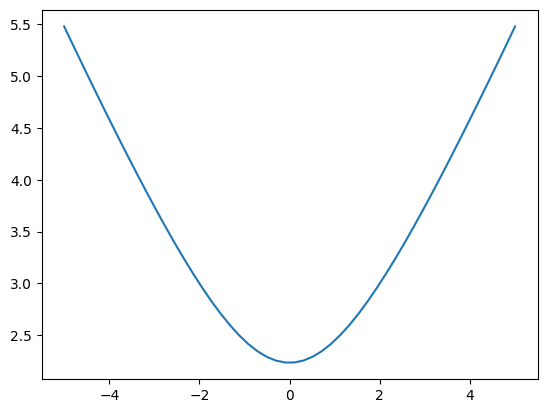

In [168]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the function f(x).

def f(x):
    return np.sqrt(x**2+5)

# Plot the function f(x), np.linspace might be helpful.

x=np.linspace(-5,5)
plt.plot(x,f(x))


[1.4, 1.1346656847473837, 0.9084096909917239, 0.720219909434137, 0.566929114609122, 0.44404790985291637, 0.34665753980766334, 0.2700576044629282, 0.21010653526191203, 0.16333132000555306, 0.12690636857932286, 0.09857483378152743, 0.07655421790278122, 0.05944619768488821, 0.046158318690424964, 0.035839203205194924, 0.027826342887111305, 0.021604665190219828, 0.016773940664962874, 0.013023279036260743, 0.010111234704299152, 0.007850317005613684, 0.006094943576556449, 0.004732077823746108, 0.0036739554242788863, 0.0028524351256628356, 0.0022146117603813182, 0.0017194097592550298, 0.00133493816263196, 0.0010364369680862828, 0.0008046826414778972, 0.0006247501444629137, 0.00048505177071833026, 0.0003765909000768629, 0.00029238261604314113, 0.00022700387611087984, 0.00017624426655846116, 0.00013683485061394366, 0.00010623764790485248, 8.24821876831701e-05, 6.403860983647141e-05, 4.971914136445007e-05, 3.860160337981512e-05, 2.9970022461326072e-05, 2.3268521710855938e-05, 1.806552208299728e-0

Text(0.5, 1.0, '$f(x_k)$ vs. Iteration Number')

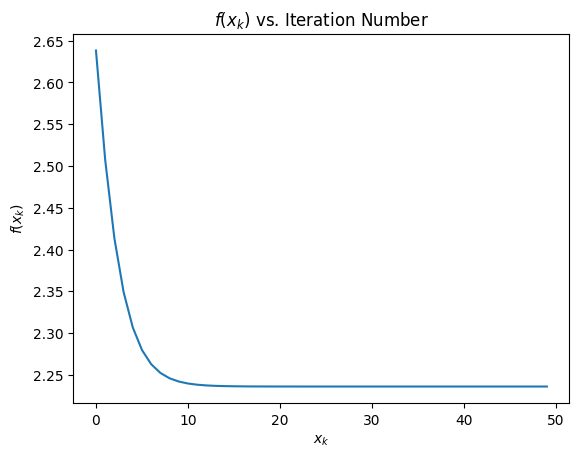

In [169]:
# Define the derivative of the function f(x), for gradient descent

def df(x):
    return x/np.sqrt(x**2+5)

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.

def gradDesc(x_0, step_size, num_iterations):

    x = [x_0]*(num_iterations+1)

    for k in range(num_iterations):
        x[k+1] = x[k] - step_size * df(x[k])
    
    return x

# set up/assign initial values

x_0 = 1.4
step_size = .5
num_iterations = 50

# Run gradient descent by calling the function

x_T = gradDesc(x_0, step_size, num_iterations)

# report x_T by printing out the value

print(x_T)


# Plot the f(x_k) values vs. iteration number

x_plot = range(num_iterations)
plt.plot(x_plot, [f(x_T[k]) for k in x_plot])
plt.ylabel("$f(x_k)$")
plt.xlabel("$x_k$")
plt.title("$f(x_k)$ vs. Iteration Number")

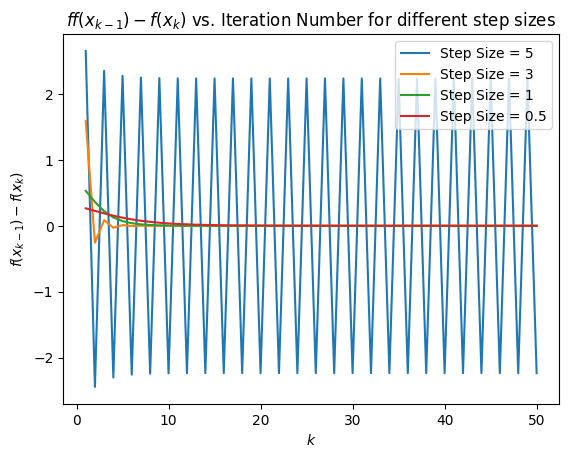

In [170]:
# create a list containing step sizes

step_sizes = [5, 3, 1, 0.5]

# initialize a list to store the results from different step sizes

results = [[0]*num_iterations,[0]*num_iterations,[0]*num_iterations,[0]*num_iterations]
differences = [[0]*num_iterations,[0]*num_iterations,[0]*num_iterations,[0]*num_iterations]

# loop through the step sizes and perform GD and record results

for i in range(len(step_sizes)):
    results[i] = gradDesc(x_0, step_sizes[i], num_iterations)
    for j in range(num_iterations):
        differences[i][j] = results[i][j] - results[i][j+1]


# plot multiple curves in a single graph
for i in range(len(step_sizes)):
    plt.plot(range(1,num_iterations+1), differences[i])

plt.xlabel("$k$")
plt.ylabel("$f(x_{k-1})-f(x_k)$")
plt.title("$ff(x_{k-1})-f(x_k)$ vs. Iteration Number for different step sizes")
plt.legend(['Step Size = 5', 'Step Size = 3', 'Step Size = 1', 'Step Size = 0.5'])

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 3.835332176200749
Coefficients: [4.40121544 0.41474253]


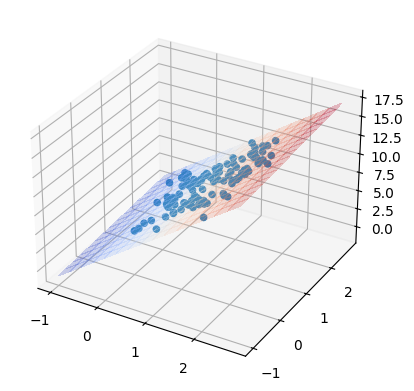

In [171]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Generate synthetic data
np.random.seed(92)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation

X_b = np.c_[X, np.ones((100, 1))]

# Find theta using the normal equation

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the intercept and coefficients of the regression plane

print("Intercept: " + str(theta_best[2]))
print("Coefficients: " + str(theta_best[0:2]))

# Plot the generated data and the regression plane

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data
X1 = np.arange(-1, 3, 0.25)
X2 = np.arange(-1, 3, 0.25)
X1, X2 = np.meshgrid(X1, X2)
Y = theta_best[0]*X1+theta_best[1]*X2+theta_best[2]



# Plot the surface
ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.25)

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], y, alpha=1)

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate random data

np.random.seed(595)
X = np.random.rand(2, 100)

# Generate Y values with added noise

w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
Y = (probabilities > 0.5).astype(int)
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Partition training and testing data

X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize variables and set parameters

w = np.zeros(X.shape[0])
b = 0.0
learning_rate = 6
num_epochs = 50

# Perform training

for epoch in range(num_epochs):

    # Calculate sigmoid values with current weights and biases
    
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Calculate gradients

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # Update weights and biases

    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# Calculate final output values, select those higher than 0.5

A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Calculate percentage of accurate predictions

train_accuracy = np.mean(predictions_train == Y_train)

test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

print(w)
print(b)

Training Set Accuracy: 0.90
Test Set Accuracy: 0.95
[ 4.8130774  -7.56197359]
3.026959357401121


With a learning rate of 1, the training set accuracy converges to .9 and the test accuracy converges to .95 after about 300 epochs. We can turn the learning rate all the way up to 6 and the model still converges in terms of accuracy. This allows us to turn the number of epochs down to 50. We can see in the plots below that the decision boundary line is as good as it could be to fit the training data. The output weights and biases are 4.8130774, -7.56197359, and 3.026959357401121 respectively, which have roughly the same proportions as the actual weights and biases, 1.5, -2.5, and 1. In terms of the decision boundary, only the proportions of the weights and biases actually matter. This is because if $w^Tx+b$ is positive, then surely $cw^Tx+cb$ will also be positive for any positive constant $c$. The sigmoid function will map positive values to above the decision boundary, and negative values to below the decision boundary. Thus, if we multiply the weights and biases by a positive scalar the decision accuracy will not change.

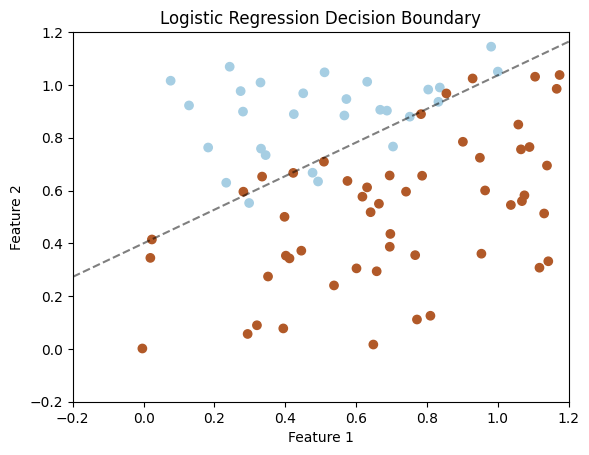

In [89]:
# Plot model accuracy for training data

plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

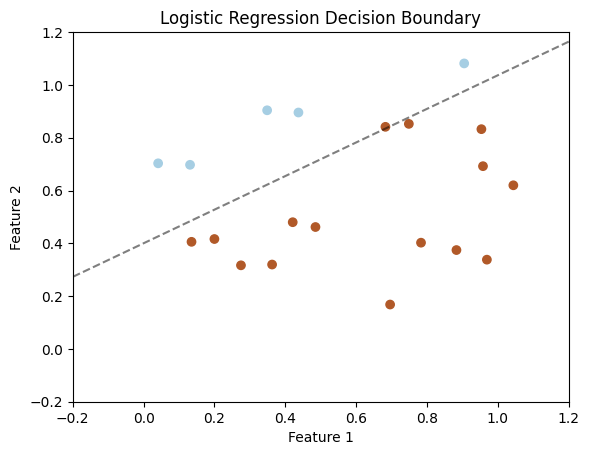

In [90]:
# Plot model accuracy for test data

plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)